Create a TextBlob

In [1]:
from textblob import TextBlob

Word Frequencies via 'word_counts' Dictionary in a TextBlob

In [2]:
from pathlib import Path

[TragedieofHamlet](https://www.gutenberg.org/ebooks/1122) is a book available in [gutenberg.org](https://www.gutenberg.org/).

This book is uesd for creating a top-20 word-frequency bar chart and a word cloud object. 

In [3]:
# load the text file in TextBlob object
toh_book = TextBlob(Path('TragedieofHamlet.txt').read_text())
toh_book.sentiment # Sentiment(polarity=0.16137681697317607, subjectivity=0.518875414457855)

Sentiment(polarity=0.16137681697317607, subjectivity=0.518875414457855)

Deleting stop words


In [4]:
from nltk.corpus import stopwords
from operator import itemgetter

In [5]:
waste_words = stopwords.words('english')

In [6]:
new_list = []
for word,count in toh_book.word_counts.items():
    if word in waste_words:
        continue
    new_list.append((word,count))

f_list = sorted(new_list, key=itemgetter(1), reverse=True)

# top 20 frequency words
top20 = f_list[:20]
top20
# [Sentiment(polarity=0.16137681697317607, subjectivity=0.518875414457855)
# [('ham', 337), ('lord', 211), ('haue', 175), ('king', 172), ('shall', 107),........]

[('ham', 337),
 ('lord', 211),
 ('haue', 175),
 ('king', 172),
 ('shall', 107),
 ('thou', 105),
 ('come', 104),
 ('let', 104),
 ('hamlet', 102),
 ('good', 98),
 ('hor', 95),
 ('thy', 90),
 ('enter', 85),
 ('oh', 81),
 ('like', 77),
 ('well', 70),
 ('know', 69),
 ('would', 68),
 ('selfe', 67),
 ('may', 65)]

Crearting Pandas Dataframe object for visualization

In [7]:
import pandas as pd

In [8]:
data_frame = pd.DataFrame(top20,columns=['word','count'])
data_frame

,word,count
0,ham,337
1,lord,211
2,haue,175
3,king,172
4,shall,107
5,thou,105
6,come,104
7,let,104
8,hamlet,102
9,good,98


In [9]:
import matplotlib.pyplot as plt

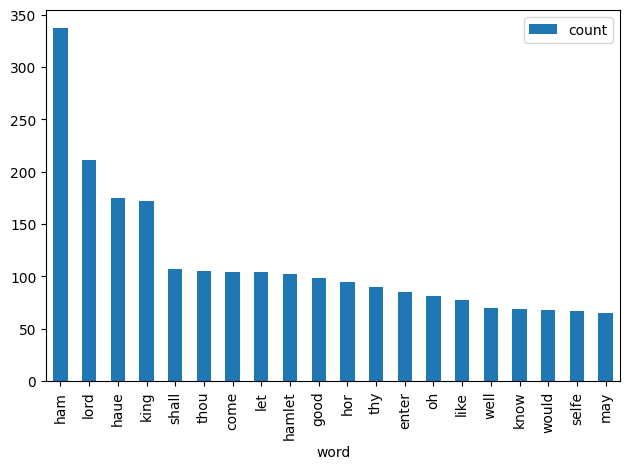

In [10]:
axes = data_frame.plot.bar(x='word', y='count')
plt.gcf().tight_layout() 

Visualizing top 200 words from Romeo & Juliet Book in Word Cloud 

In [11]:
# loading mask image that specifies shape of word cloud
import imageio
masked_shape = imageio.v3.imread('mask_star.png')

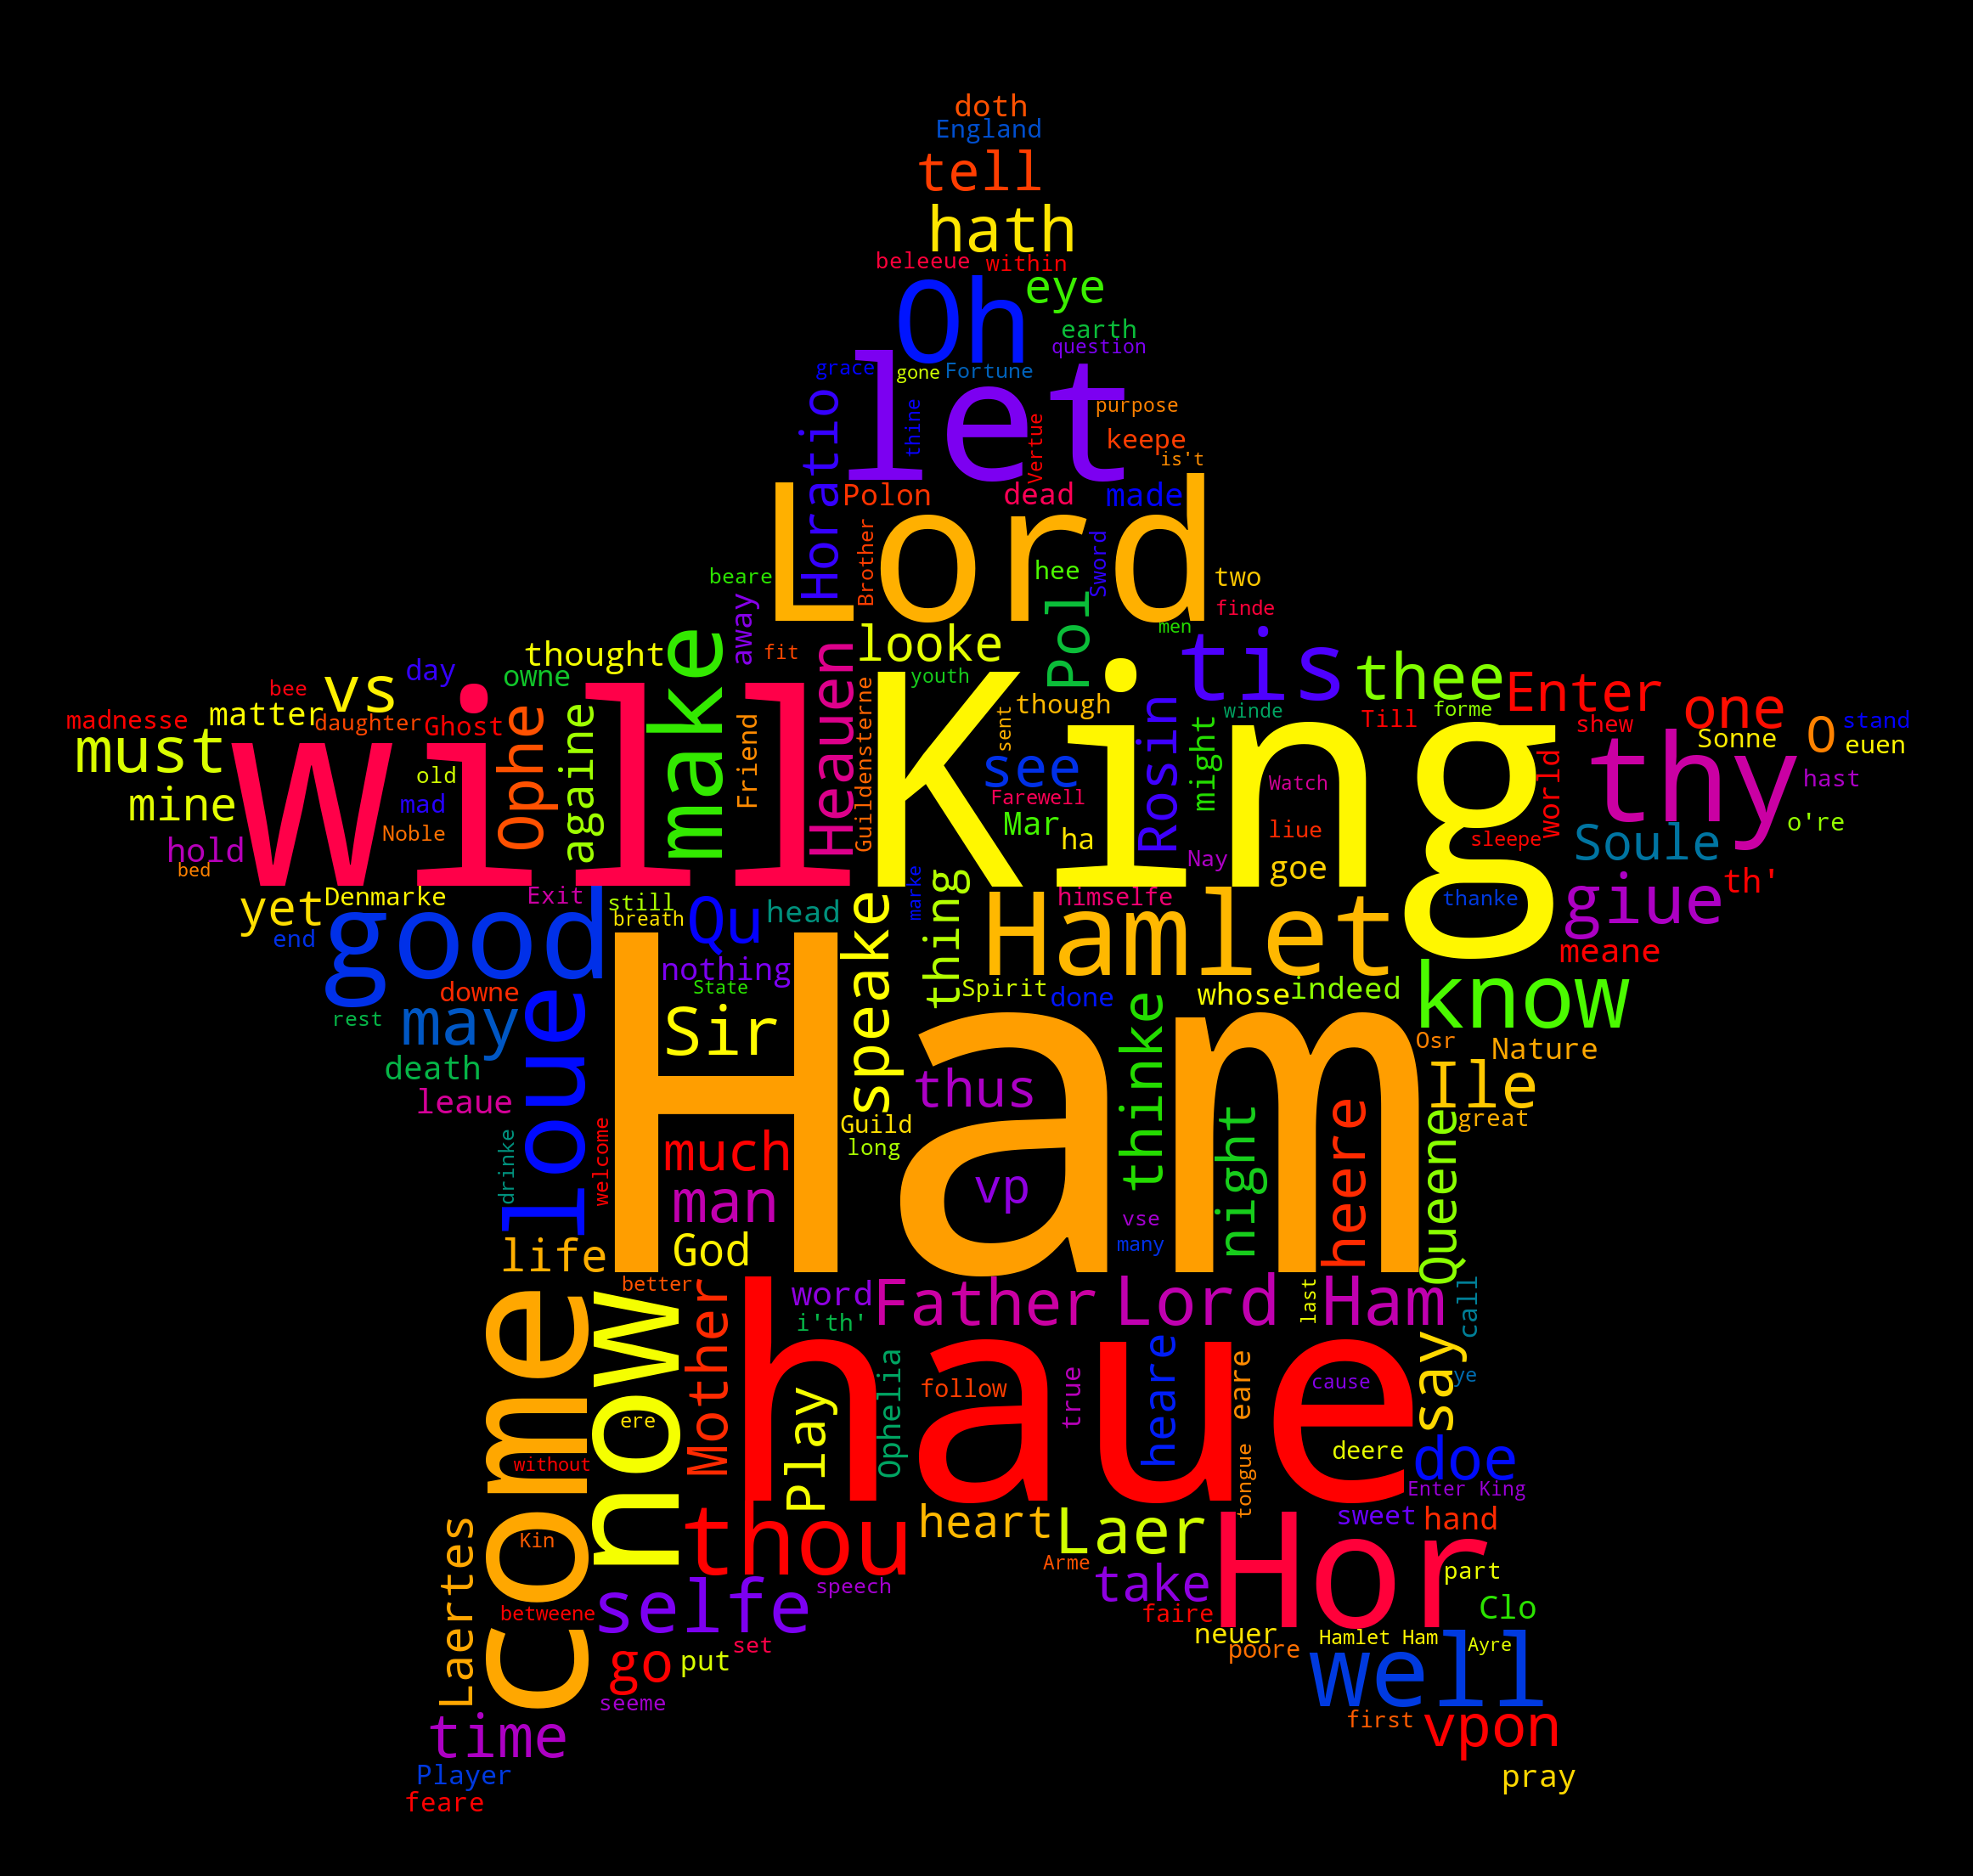

In [12]:
from wordcloud import WordCloud

# generate masked-shaped image of 100 top words from rj_book
WordCloud(width=1000, height=1000, colormap='prism', 
    mask=masked_shape, max_words=200).generate(toh_book.string).to_image()

[NYTimes_Arcicle.txt](https://www.nytimes.com/2023/01/29/climate/gas-stove-health.html?smid=url-share) is the article used from NYTimes Article.

It is uesd for creating a top-20 word-frequency bar chart and a word cloud object. 

In [13]:
import re

In [14]:
nytimes_article = str(TextBlob(Path('NYTimes_Arcicle.txt').read_text('Utf-8')))
nytimes_article = re.sub("[^A-z \n\-]", "", nytimes_article)
nytimes_article = TextBlob(nytimes_article)
nytimes_article.sentiment 

# Sentiment(polarity=0.0865297835497835, subjectivity=0.38012086580086574)

Sentiment(polarity=0.0865297835497835, subjectivity=0.38012086580086574)

In [15]:
new_list = []
for word,count in nytimes_article.word_counts.items():
    if word in waste_words:
        continue
    new_list.append((word,count))

f_list = sorted(new_list, key=itemgetter(1), reverse=True)

# top 20 frequency words
top20 = f_list[:20]
top20

[('gas', 42),
 ('said', 25),
 ('dr', 19),
 ('health', 17),
 ('goodman', 17),
 ('stoves', 16),
 ('research', 12),
 ('asthma', 11),
 ('air', 10),
 ('county', 9),
 ('concerns', 7),
 ('hearing', 7),
 ('pollution', 7),
 ('cooking', 7),
 ('american', 7),
 ('association', 7),
 ('group', 7),
 ('industry', 7),
 ('work', 6),
 ('stove', 6)]

In [16]:
data_frame = pd.DataFrame(top20,columns=['word','count'])
data_frame

,word,count
0,gas,42
1,said,25
2,dr,19
3,health,17
4,goodman,17
5,stoves,16
6,research,12
7,asthma,11
8,air,10
9,county,9


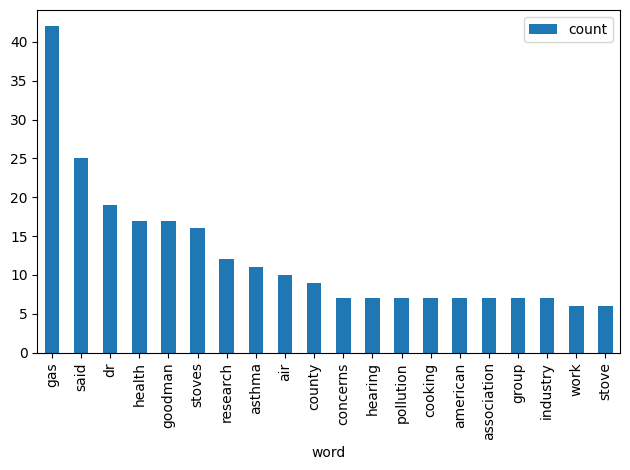

In [17]:
axes = data_frame.plot.bar(x='word', y='count')
plt.gcf().tight_layout() 

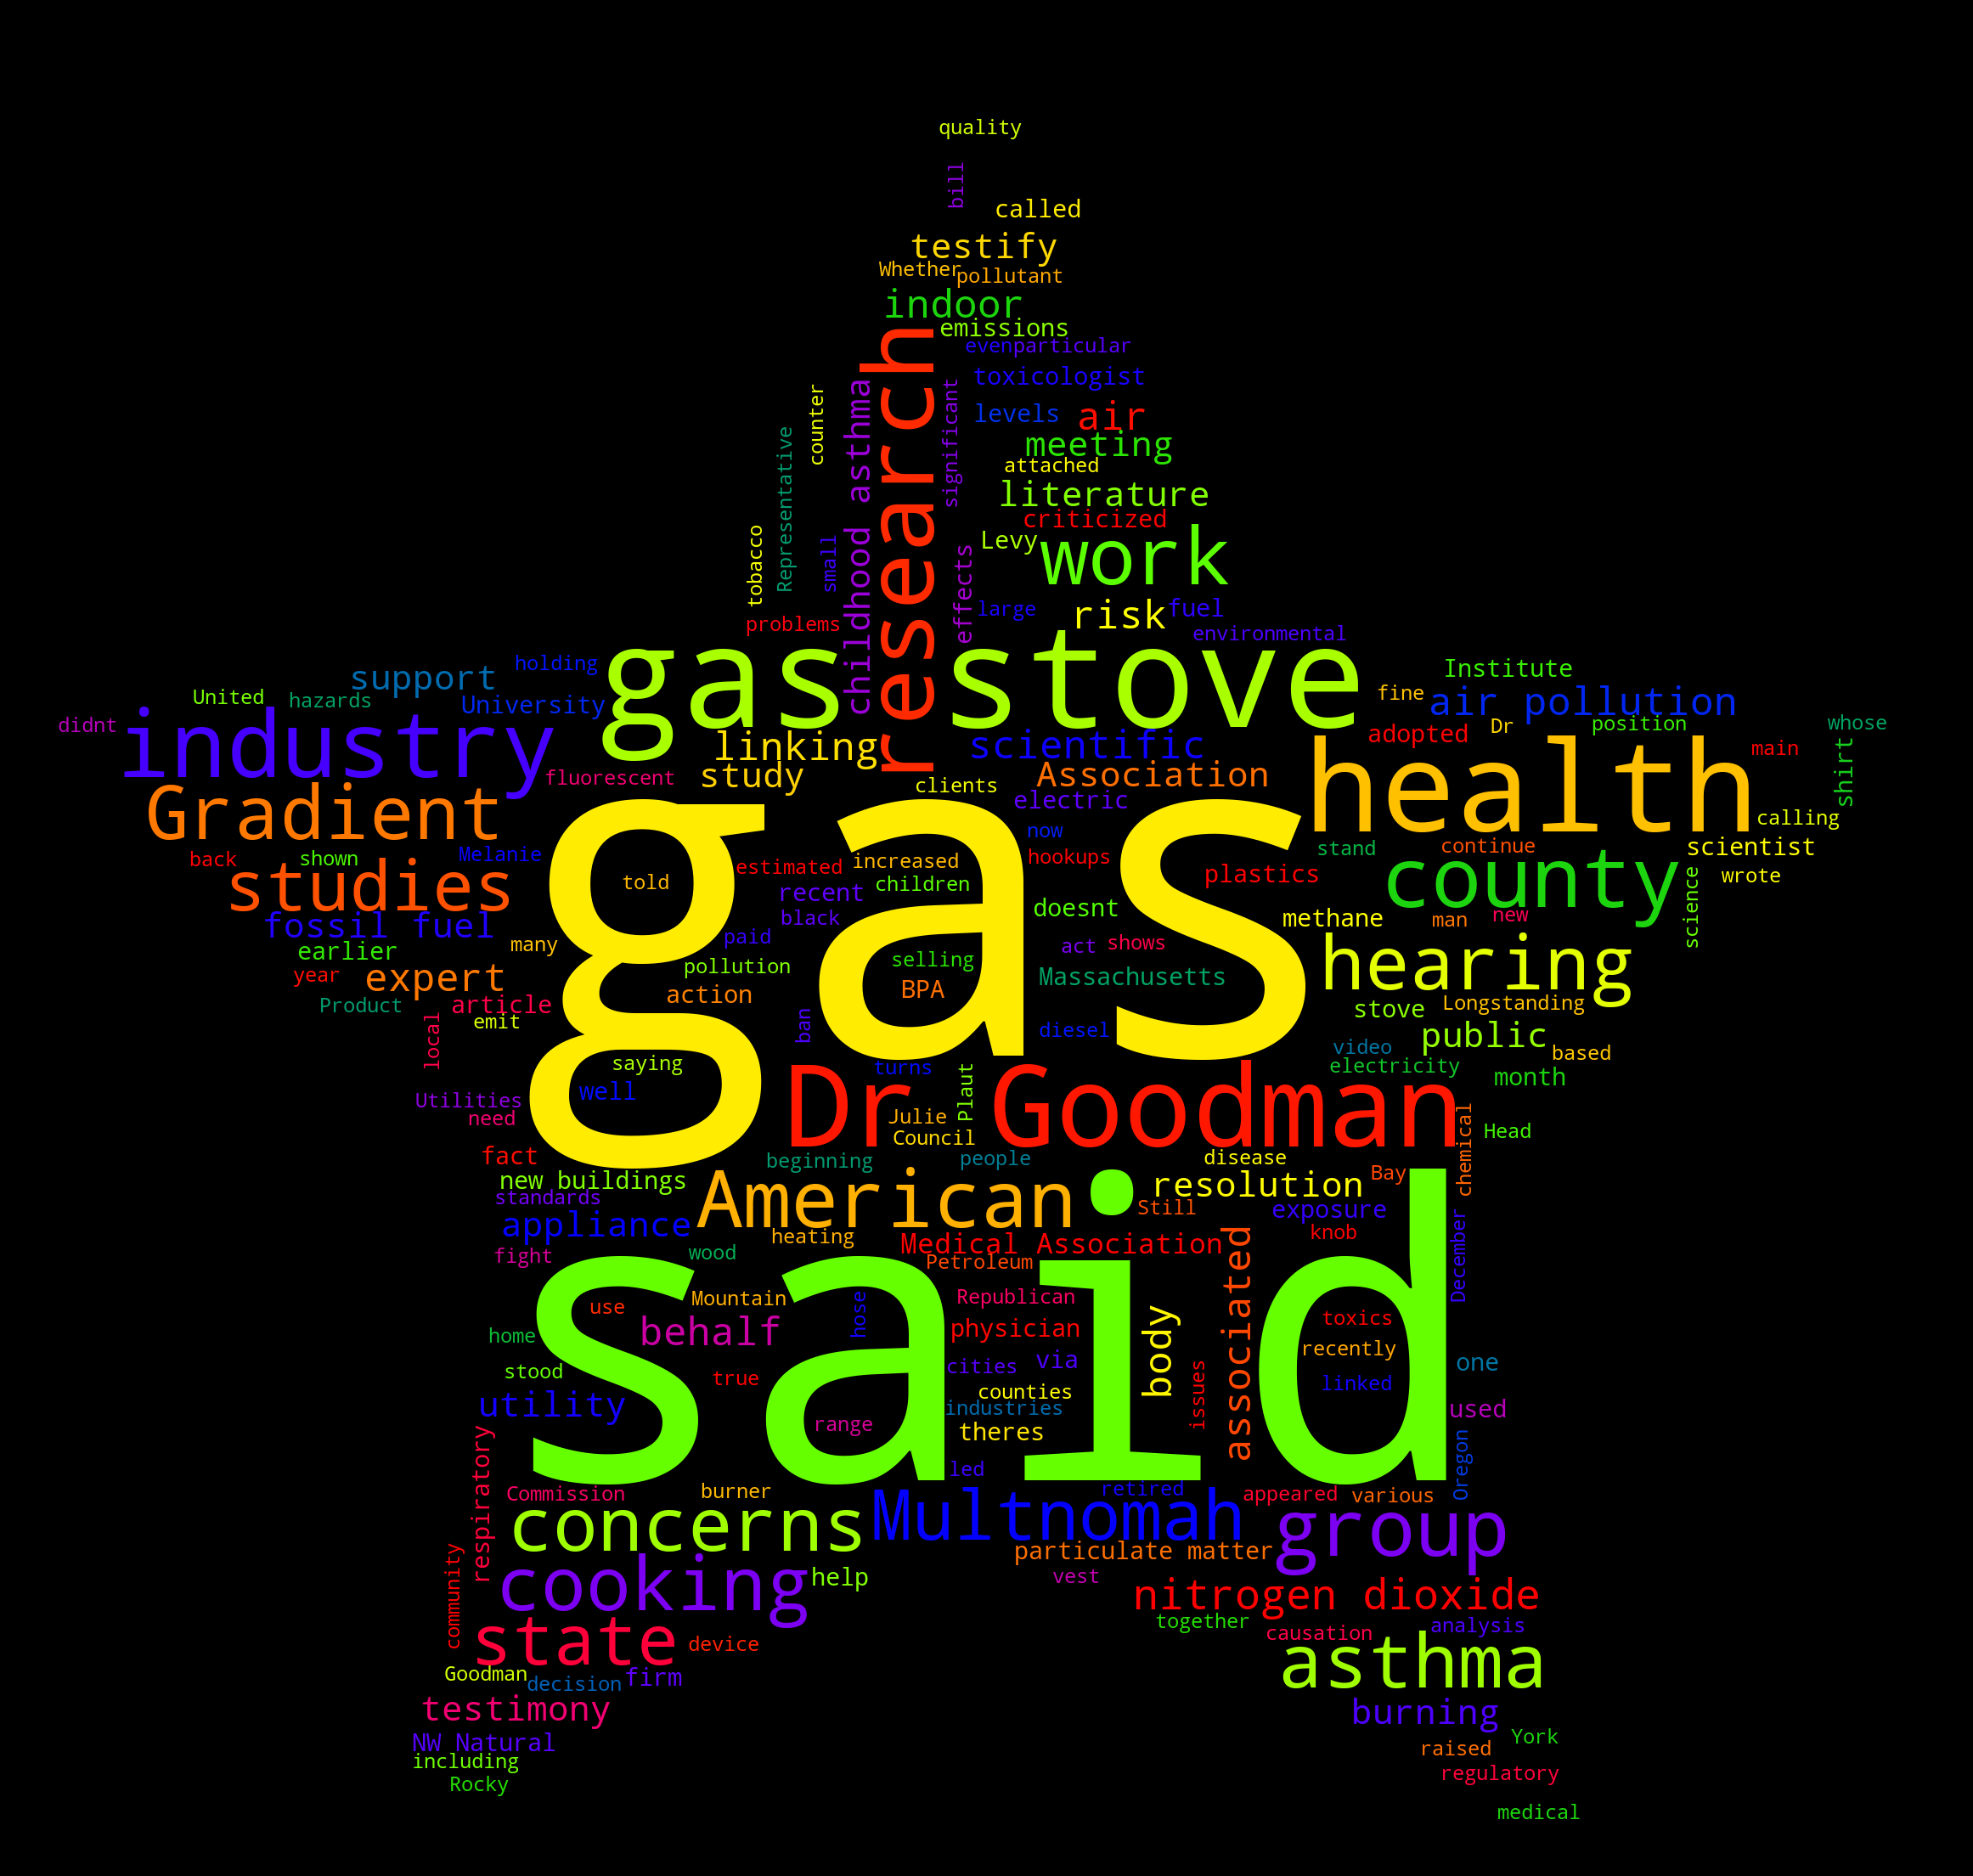

In [18]:
WordCloud(width=1000, height=1000, colormap='prism', 
    mask=masked_shape, max_words=200).generate(nytimes_article.string).to_image()